<a href="https://colab.research.google.com/github/Burhan2409/Machine_learning_Algo/blob/main/Titanic_DecisionTreeAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('/content/titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data1 = data.drop(['PassengerId','Embarked','Cabin','Parch','SibSp','Name','Ticket'] , axis=1)

In [7]:
data1.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [8]:
data1 = data1.fillna(method='ffill')

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le_sex = LabelEncoder().fit_transform(data1['Sex'])

In [11]:
data1['Gender']  = le_sex

In [12]:
data1.drop(['Sex'],axis=1 , inplace=True)

In [13]:
feature = data1.drop(['Survived'] , axis=1 )
feature

,Pclass,Age,Fare,Gender
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,19.0,23.4500,0
889,1,26.0,30.0000,1


In [14]:
target = data1['Survived']

In [27]:
from sklearn import tree
from sklearn.tree import export_text , export_graphviz , plot_tree


In [16]:
model = tree.DecisionTreeClassifier()

In [17]:
model.fit(feature,target)

DecisionTreeClassifier()

In [18]:
model.score(feature,target)

0.9831649831649831

In [19]:
y_pred = model.predict(feature)

In [20]:
data1['Observation'] = target
data1['Prediction'] = y_pred

In [21]:
data1.head()

,Survived,Pclass,Age,Fare,Gender,Observation,Prediction
0,0,3,22.0,7.2500,1,0,0
1,1,1,38.0,71.2833,0,1,1
2,1,3,26.0,7.9250,0,1,1
3,1,1,35.0,53.1000,0,1,1
4,0,3,35.0,8.0500,1,0,0


In [22]:
from sklearn.model_selection import train_test_split



In [23]:
X_train , X_test , y_train , y_test = train_test_split(feature,target,test_size=0.20)


In [24]:
model1 = tree.DecisionTreeClassifier()

In [25]:
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
model1.score(X_test,y_test)

0.7597765363128491

In [28]:
text_representation = export_text(model1)
print(text_representation)

|--- feature_3 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_1 <= 2.50
|   |   |   |--- feature_2 <= 131.22
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  131.22
|   |   |   |   |--- class: 0
|   |   |--- feature_1 >  2.50
|   |   |   |--- feature_2 <= 22.00
|   |   |   |   |--- feature_1 <= 56.00
|   |   |   |   |   |--- feature_1 <= 27.50
|   |   |   |   |   |   |--- feature_2 <= 19.88
|   |   |   |   |   |   |   |--- feature_2 <= 12.68
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_2 >  12.68
|   |   |   |   |   |   |   |   |--- feature_2 <= 15.88
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_2 >  15.88
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_2 >  19.88
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  27.50
|   |   |   |   |   |   |--- feature_1 <= 37.00
|   |   |   |   |   |   |   |--- class: 1


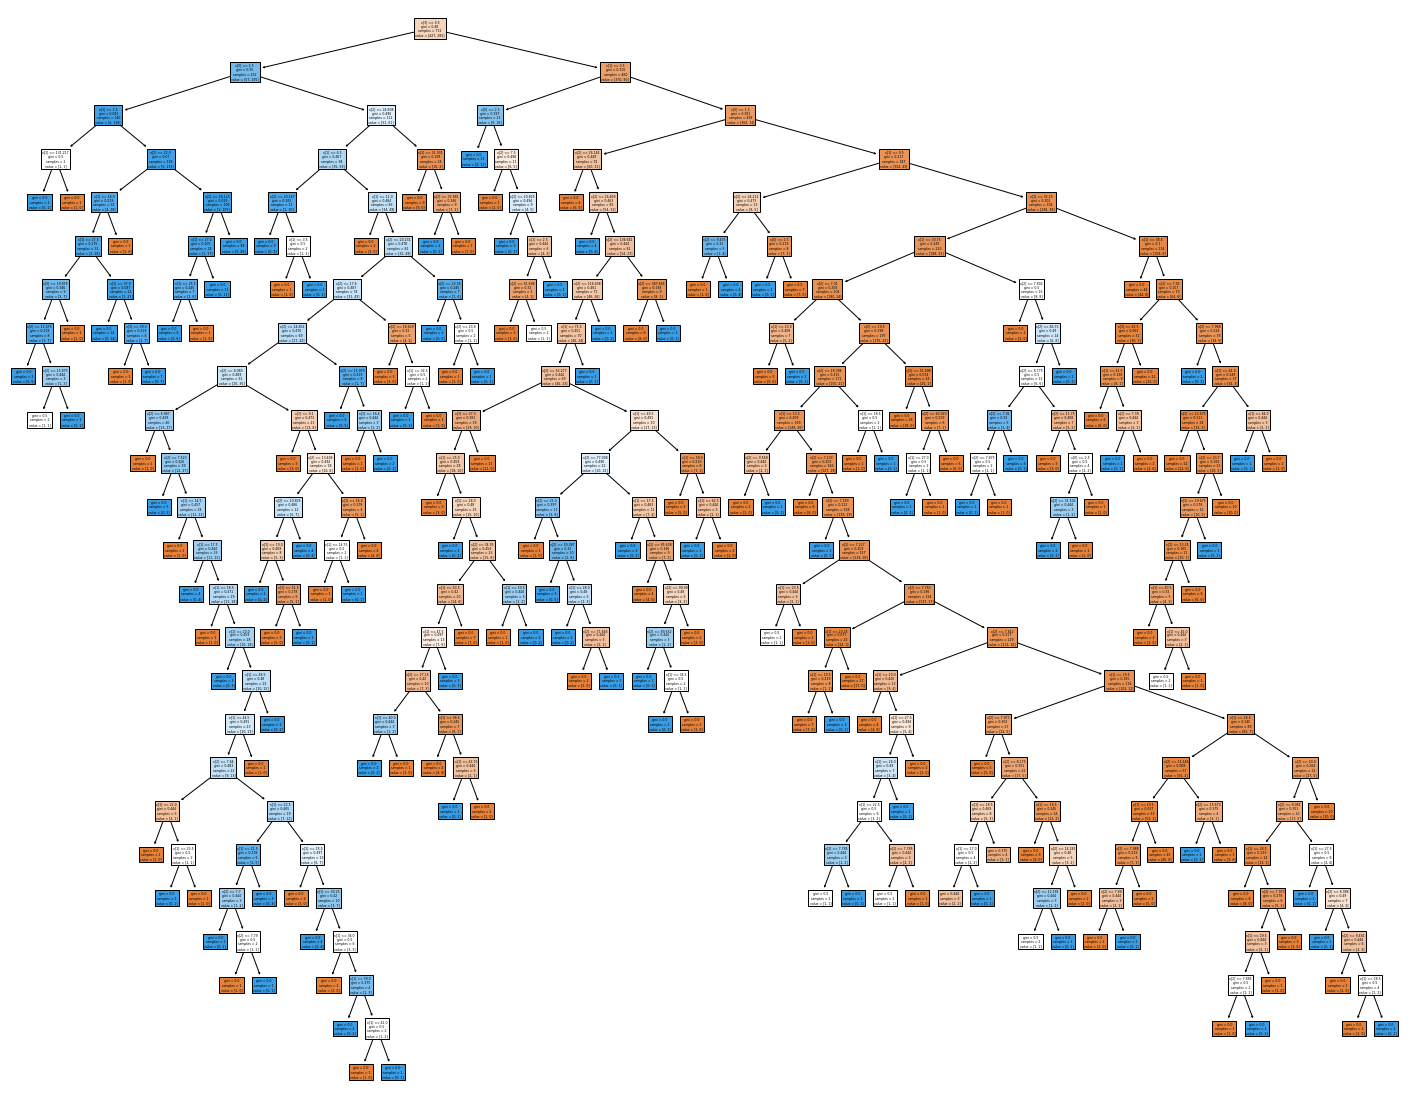

In [37]:
fig = plt.figure(figsize=(25,20))
plot_tree(model1 , filled=True)
plt.show()